In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas 1

**EXERCISE 1**

In [2]:
idx = np.linspace(2,50,25)
values = idx**2 - 1

In [3]:
s1 = pd.Series(values, index=idx)
s1[np.array([i % 3 == 0 for i in s1.index])] = 0
s1

2.0        3.0
4.0       15.0
6.0        0.0
8.0       63.0
10.0      99.0
12.0       0.0
14.0     195.0
16.0     255.0
18.0       0.0
20.0     399.0
22.0     483.0
24.0       0.0
26.0     675.0
28.0     783.0
30.0       0.0
32.0    1023.0
34.0    1155.0
36.0       0.0
38.0    1443.0
40.0    1599.0
42.0       0.0
44.0    1935.0
46.0    2115.0
48.0       0.0
50.0    2499.0
dtype: float64

**EXERCISE 2**

In [5]:
def stock_series(p, d=100):
    
    date = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    
    change = np.random.binomial(1, p, size=len(date))
    
    s2 = pd.Series(change, index=date)
    for ii in range(len(date)):
        if s2[ii] == 0:
            s2[ii] = -1
    
    s2[0] = d
    
    s3 = s2.cumsum()
    
    s3[s3 < 0] = 0
    
    s3.plot()
    plt.ylabel("Stock Value")
    plt.xlabel("Date")
    plt.show()

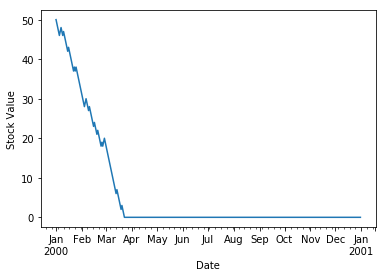

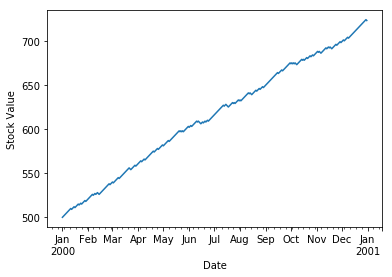

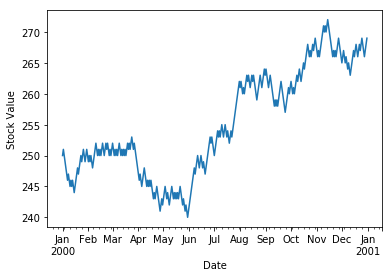

In [6]:
stock_series(.2, 50)
stock_series(.8, 500)
stock_series(.5, 250)

**EXERCISE 3**

In [7]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [8]:
#SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = 'M'
studentInfo[(studentInfo['Age']>19) & (studentInfo['Sex']=='M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


**EXERCISE 4**

In [9]:
#pd.merge(studentInfo[studentInfo['Sex']=='M'], otherInfo, on='ID', how='outer')[['ID','Age','GPA']]
pd.merge(studentInfo[studentInfo['Sex']=='M'], otherInfo, on='ID')[['ID','Age','GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


# Pandas 2

In [10]:
!pip install pydataset
from pydataset import data

**Birth rates**

In [15]:
#data('Arbuthnot', show_doc=True)

Source: Arbuthnot, John (1710). "An argument for Devine Providence, taken from the constant Regularity observ'd in the Births of both Sexes," _Philosophical transactions_, 27, 186-190. Published in 1711.

In [11]:
br = data("Arbuthnot")
br.index= br["Year"]

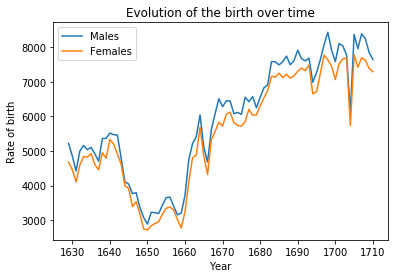

In [12]:
#br.keep(["Males","Females"], axis=1).plot(linewidth=1)
plt.plot(br.index, br["Males"], label="Males")
plt.plot(br.index, br["Females"], label="Females")
plt.ylabel("Rate of birth")
plt.xlabel("Year")
plt.title("Evolution of the birth over time")
plt.legend(loc="best")
plt.show()

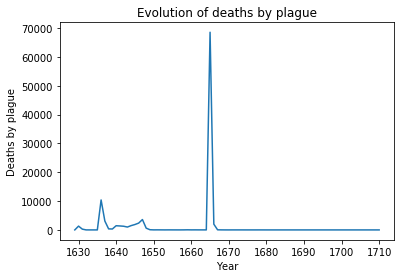

In [17]:
plt.plot(br.index, br["Plague"], label="Plague")
plt.ylabel("Deaths by plague")
plt.xlabel("Year")
plt.title("Evolution of deaths by plague")
plt.show()

Text(0.5, 1.0, 'Variation in birth rates by gender')

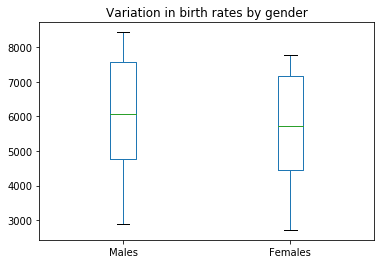

In [21]:
br.plot(kind="box", y=["Males","Females"])
plt.title("Variation in birth rates by gender")

Text(0.5, 1.0, 'Distribution of birth rates by gender')

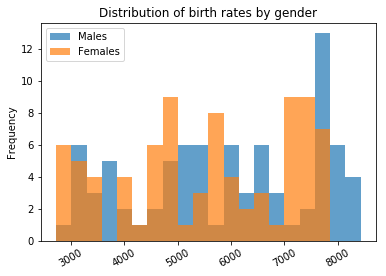

In [23]:
br.plot(kind="hist", y=["Males", "Females"], bins=20, alpha=.7, rot=30)
plt.title("Distribution of birth rates by gender")

Text(0.5, 1.0, 'Time vs. gender birth ratio')

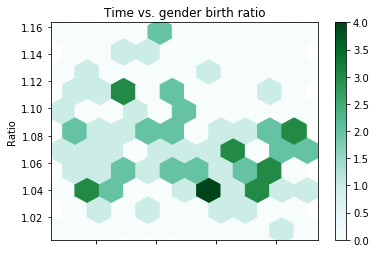

In [31]:
br.plot(kind="Hexbin", x="Year", y="Ratio", gridsize=10)
plt.title("Time vs. gender birth ratio")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F531DD7F60>,
      dtype=object)

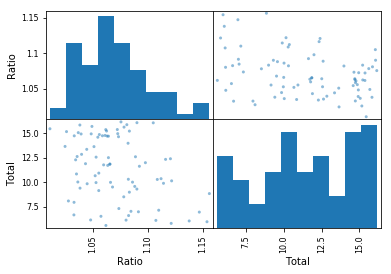

In [26]:
pd.plotting.scatter_matrix(br[["Ratio", "Total"]])

**Road accident deaths**

In [27]:
#data('road', show_doc=True)

In [28]:
rd = data("road")
#rd.index= br["Year"]

In [29]:
rd.head()

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F53091CEB8>,
      dtype=object)

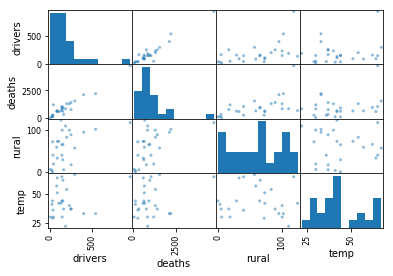

In [30]:
pd.plotting.scatter_matrix(rd[["drivers","deaths","rural","temp"]])

Text(0.5, 1.0, 'Temperature vs. death tol')

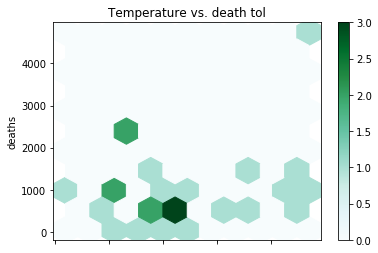

In [32]:
rd.plot(kind="Hexbin", x="temp", y="deaths", gridsize=10)
plt.title("Temperature vs. death tol")

In [33]:
#rd.plot(kind="scatter", x="rural", y="popden", alpha=.8)

Text(0.5, 1.0, 'Rural vs. population density (excl. DC)')

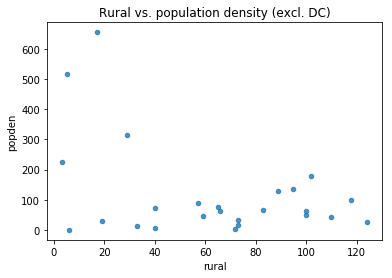

In [34]:
rd.drop(["DC"], axis=0).plot(kind="scatter", x="rural", y="popden", alpha=.8)
plt.title("Rural vs. population density (excl. DC)")

Text(0.5, 1.0, 'Popden vs. deaths (excl. DC)')

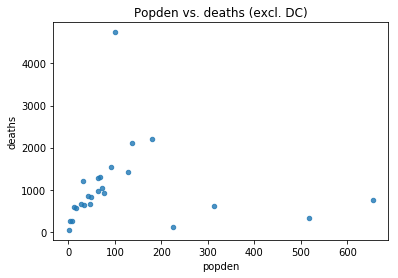

In [35]:
rd.drop(["DC"], axis=0).plot(kind="scatter", x="popden", y="deaths", alpha=.8)
plt.title("Popden vs. deaths (excl. DC)")

C:\Users\woute\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


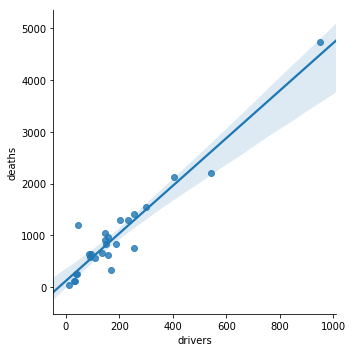

In [36]:
#rd.plot(kind="scatter", x="drivers", y="deaths", alpha=.8)

import seaborn as sns
sns.lmplot(x='drivers',y='deaths',data=rd,fit_reg=True) 

 # Pandas 3

**EXERCISE 1**

In [37]:
iris = data("iris")
pois = data("poisons")
diam = data("diamonds")

In [38]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [39]:
species = iris.groupby("Species")

Text(0.5, 1.0, 'Comparison')

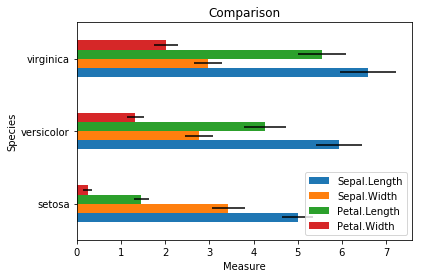

In [40]:
species[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(kind="barh", xerr=species.std())
plt.xlabel("Measure")
plt.title("Comparison")

The Setosa is the easiest to distinguish given its small petal width and length.

Without data one could use the above distinguishing characteristics to classify the Setosa. The remaining flowers could be classified as either Virginica or Versicolor based on the petal length.

In [41]:
pois.head()

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A


In [42]:
data('poisons', show_doc=True)

poisons

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Animal Survival Times

### Description

The `poisons` data frame has 48 rows and 3 columns.

The data form a 3x4 factorial experiment, the factors being three poisons and
four treatments. Each combination of the two factors was used for four
animals, the allocation to animals having been completely randomized.

### Usage

    poisons

### Format

This data frame contains the following columns:

`time`

The survival time of the animal in units of 10 hours.

`poison`

A factor with levels `1`, `2` and `3` giving the type of poison used.

`treat`

A factor with levels `A`, `B`, `C` and `D` giving the treatment.

### Source

The data were obtained from

Box, G.E.P. and Cox, D.R. (1964) An analysis of transformations (with
Discussion). _ Journal of the Royal Statistical Society, B_, **26**, 211–252.

### References

Davison, A.C. and Hinkley, D.V. (1997) _Bootstrap Methods and Their
Applica

In [43]:
type_treat = pois.groupby(["poison", "treat"])

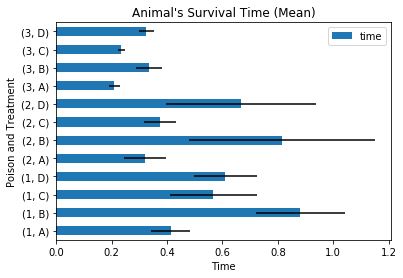

In [44]:
type_treat[["time"]].mean().plot(kind="barh", xerr=type_treat.std(), title="Animal's Survival Time (Mean)")
plt.xlabel("Time")
plt.ylabel("Poison and Treatment")
plt.show()

Given the relatively lower survival times for poison 3, this appears to be deathliest.

Treatment B seems to have the best results across poisons. Without info I would opt for the treatment with the highest average survival time for this poison, which - at first sight - also appears to be B.

In [45]:
diam.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
#colors = diam.groupby("color")
#cut = diam.groupby("cut")

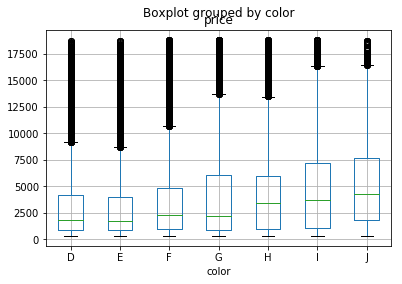

In [47]:
diam.boxplot(["price"], by="color")

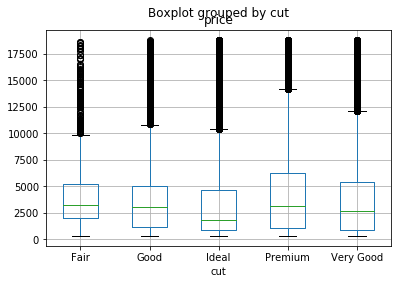

In [48]:
diam.boxplot(["price"], by="cut")

The price associated with diamonds of colors H, I, and J are higher on average. The evidence for such a linear relationship between the cut and the price is less clear.

In [49]:
color_cut = diam.groupby(["color", "cut"])

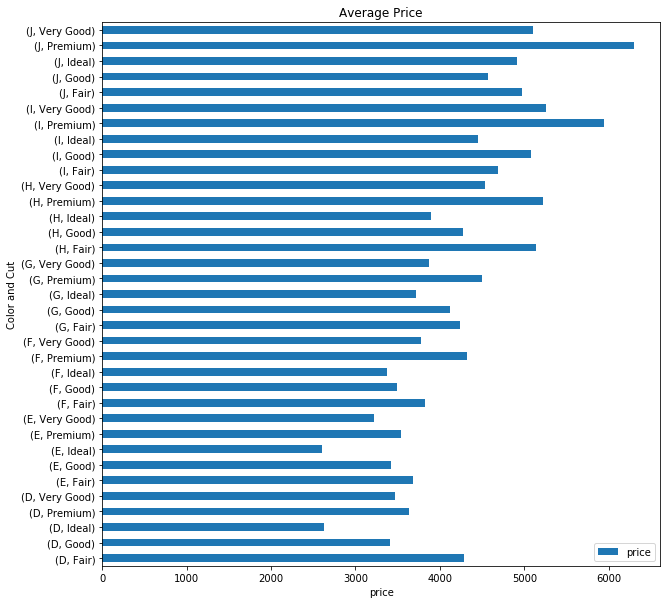

In [50]:
color_cut[["price"]].mean().plot(figsize=(10,10), kind="barh", title="Average Price")
plt.xlabel("price")
plt.ylabel("Color and Cut")
plt.show()

In [51]:
subdata = diam
subdata.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
subdata = subdata[subdata.color == 'H']

In [53]:
subdata = subdata[subdata.cut != 'Good']
subdata = subdata[subdata.cut != 'Premium']
subdata = subdata[subdata.cut != 'Very Good']

In [54]:
subdata.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
129,0.91,Fair,H,SI2,64.4,57.0,2763,6.11,6.09,3.93
130,0.91,Fair,H,SI2,65.7,60.0,2763,6.03,5.99,3.95
131,0.77,Ideal,H,VS2,62.0,56.0,2763,5.89,5.86,3.64
139,0.76,Ideal,H,SI1,61.2,57.0,2765,5.88,5.91,3.61
205,0.98,Fair,H,SI2,67.9,60.0,2777,6.05,5.97,4.08


In [55]:
subdata.describe()

,carat,depth,table,price,x,y,z
count,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000
mean,0.836726,61.986015,56.207899,3999.821533,5.806551,5.807548,3.600149
std,0.506777,1.419335,1.820265,4017.387707,1.172717,1.159400,0.736558
min,0.230000,52.700000,50.000000,357.000000,3.940000,3.970000,1.410000
25%,0.380000,61.400000,55.000000,876.000000,4.670000,4.690000,2.890000
50%,0.720000,61.900000,56.000000,2536.000000,5.750000,5.770000,3.560000
75%,1.140000,62.300000,57.000000,5674.500000,6.710000,6.700000,4.160000
max,4.130000,71.800000,73.000000,18760.000000,10.000000,9.850000,6.430000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F53482BDD8>,
      dtype=object)

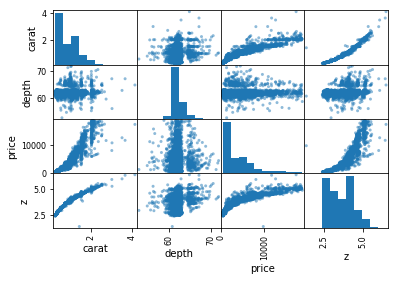

In [56]:
pd.plotting.scatter_matrix(subdata[["carat","depth","price","z"]])

Examples of other clear drivers of the price differences are the number of carats and dimension z.

**EXERCISE 2**

In [57]:
titanic = pd.read_csv('titanic.csv', sep=",", header=0)

In [58]:
titanic.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [59]:
print(titanic.pivot_table(values="Survived", index="Embarked"))

          Survived
Embarked          
C         0.555556
Q         0.357724
S         0.332604


In [60]:
print(titanic.pivot_table(values="Survived", index="Embarked", columns="Sex"))

Sex         female      male
Embarked                    
C         0.902655  0.305732
Q         0.616667  0.111111
S         0.680412  0.170144


In [61]:
fare = pd.qcut(titanic["Fare"], 3)

print(titanic.pivot_table(values="Survived", index=["Embarked", fare], columns="Sex"))

Sex                         female      male
Embarked Fare                               
C        (-0.001, 8.662]  1.000000  0.140000
         (8.662, 26.0]    0.678571  0.382353
         (26.0, 512.329]  0.974026  0.383562
Q        (-0.001, 8.662]  0.565217  0.133333
         (8.662, 26.0]    0.818182  0.083333
         (26.0, 512.329]  0.666667  0.000000
S        (-0.001, 8.662]  0.463415  0.128788
         (8.662, 26.0]    0.656934  0.140777
         (26.0, 512.329]  0.787611  0.282895


In [62]:
age = pd.qcut(titanic["Age"], 4)

print(titanic.pivot_table(values="Survived", index=["Embarked", age], columns="Sex"))

Sex                       female      male
Embarked Age                              
C        (0.166, 21.0]  0.851852  0.523810
         (21.0, 28.0]   1.000000  0.333333
         (28.0, 39.0]   0.952381  0.312500
         (39.0, 80.0]   0.935484  0.323529
Q        (0.166, 21.0]  0.444444  0.111111
         (21.0, 28.0]   0.600000  0.000000
         (28.0, 39.0]   0.400000  0.166667
         (39.0, 80.0]        NaN  0.000000
S        (0.166, 21.0]  0.650602  0.226950
         (21.0, 28.0]   0.682540  0.162791
         (28.0, 39.0]   0.772727  0.186047
         (39.0, 80.0]   0.769231  0.126050


The above tables show that people who embarked in C (Cherbourg) were much more likely to survive. Similarly, females were much more likely to survive. The latter holds irrespective of age and ticket prices.

# Pandas 4

**EXERCISE 1**

In [63]:
dj = pd.read_csv('DJIA.csv')

In [64]:
dj.head()

,DATE,VALUE
0,2006-09-27,11689.24
1,2006-09-28,11718.45
2,2006-09-29,11679.07
3,2006-10-02,11670.35
4,2006-10-03,11727.34


In [65]:
dj.index= pd.to_datetime(dj["DATE"], format="%Y-%m-%d")
dj = dj.drop(columns="DATE")
dj.head()

,VALUE
DATE,
2006-09-27,11689.24
2006-09-28,11718.45
2006-09-29,11679.07
2006-10-02,11670.35
2006-10-03,11727.34


In [66]:
dj = dj[dj["VALUE"] != "."]
dj["VALUE"] = dj["VALUE"].apply(pd.to_numeric, errors='ignore')

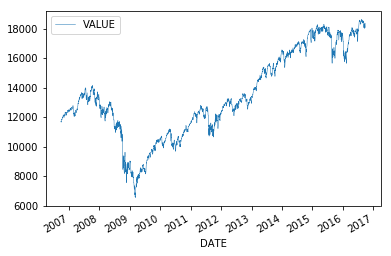

In [67]:
dj.plot(y="VALUE", lw=.5)
plt.show()

In [220]:
#or alternatively [I USE THE ABOVE METHOD FOR PROBLEM 5]
dj = pd.read_csv('DJIA.csv', header = 0, index_col = 0)
dj.index = pd.to_datetime(dj.index)
dj = dj.replace(".",np.nan)
dj = pd.Series(dj['VALUE'], index = dj.index)
dj = dj.astype(float)

dj.head()

DATE
2006-09-27    11689.24
2006-09-28    11718.45
2006-09-29    11679.07
2006-10-02    11670.35
2006-10-03    11727.34
Name: VALUE, dtype: float64

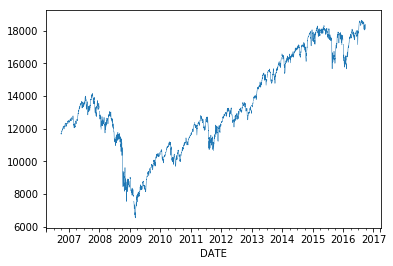

In [221]:
dj.plot(y="VALUE", lw=.5)
plt.show()

**EXERCISE 2**

In [68]:
pay = pd.read_csv("paychecks.csv", index_col=False, header=None, squeeze=True)

fri1 = pd.date_range(start = '3/13/2008', periods=47, freq="WOM-1FRI")
fri3 = pd.date_range(start ='3/13/2008', periods=46, freq="WOM-3FRI")
dates = fri1.union(fri3)

pay.index = pd.to_datetime(dates)

pay.head()

2008-03-21    1122.26
2008-04-04     921.03
2008-04-18     962.46
2008-05-02    1035.97
2008-05-16    1078.59
Name: 0, dtype: float64

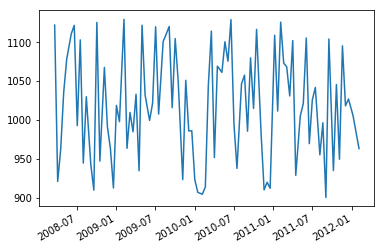

In [69]:
pay.plot(y="VALUE")
plt.show()

**EXERCISE 5**

In [70]:
single = dj.diff(periods=1)
print(single["VALUE"].idxmax())

2008-10-13 00:00:00


In [71]:
single = dj.diff(periods=1)
print(single["VALUE"].idxmin())

2008-09-29 00:00:00


In [72]:
monthly = dj.resample("M").first()

break_shift = monthly.shift(1)
monthly_gain = monthly - break_shift

print(monthly_gain["VALUE"].idxmax())

2015-11-30 00:00:00


In [73]:
print(monthly_gain["VALUE"].idxmin())

2015-09-30 00:00:00


**EXERCISE 6**

In [74]:
def plot_dj(s):

    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.plot(dj)
    dj.rolling(window=s).mean().plot(ax=ax)
    dj.ewm(span=s).mean().plot(ax=ax)
    dj.rolling(window=s).min().plot(ax=ax)
    dj.rolling(window=s).max().plot(ax=ax)
    
    ax.legend(["Original", "Rolling Average", "Exponential", "Minimum rolling value", "Maximum rolling value"])
    
    plt.title("DJIA")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.show()

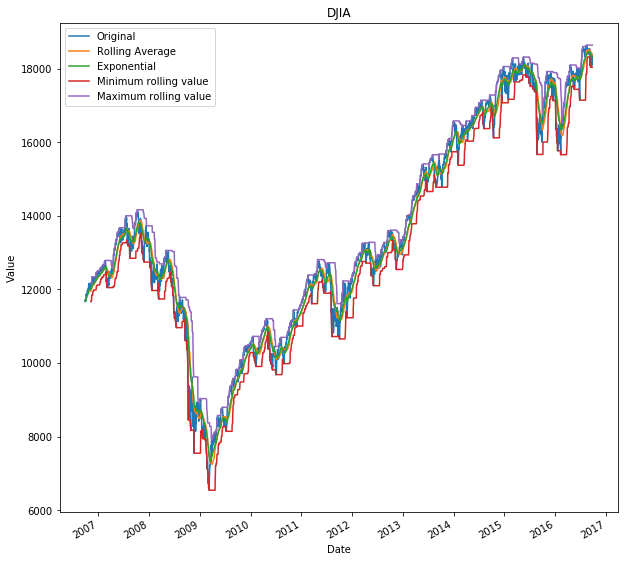

In [75]:
plot_dj(30)

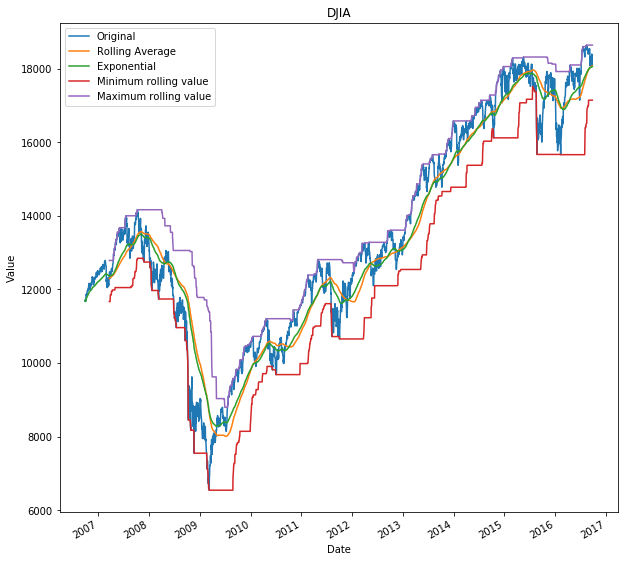

In [76]:
plot_dj(120)

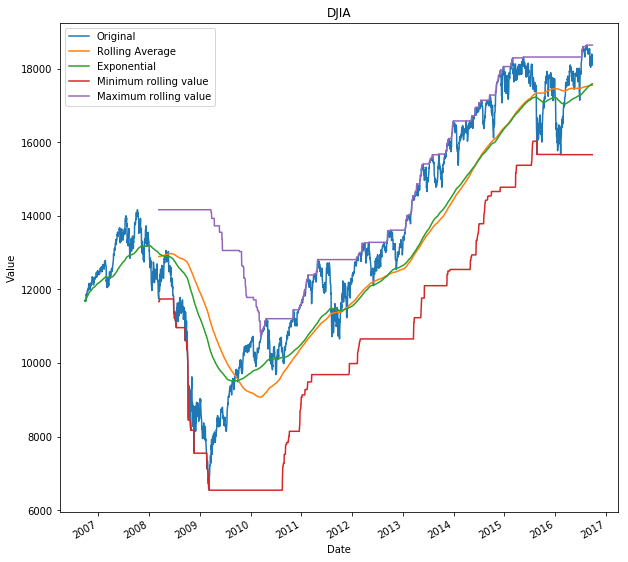

In [77]:
plot_dj(365)